In [63]:
import numpy as np
import random

In [64]:
def generate_data(n):
    x=np.sort(np.random.randn(n)*2)
    f=(np.cos(x)+2)/(np.cos(1.4*x)+2)
    noise=np.random.normal(0,1,n)*np.std(f)* 0.5
    y=f+noise
    return x,y,f


In [69]:
x,y,f=generate_data(100)
x=x.reshape(100,1)


In [70]:
y=y.reshape(100,1)


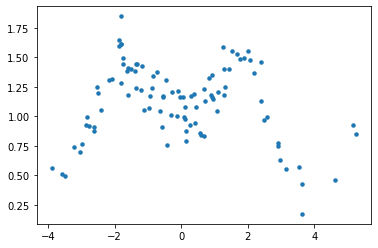

In [71]:
import matplotlib.pyplot as plt
plt.scatter(x, y, marker='.', linewidths=1.5)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [73]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
def poly_f(x):
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x=poly_features.fit_transform(x)
    return x

In [106]:
alpha = 0.05
X_train_poly= poly_f(X_train)
n, m = X_train_poly.shape
I = np.identity(m)
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train_poly.T, X_train_poly) + alpha * I), X_train_poly.T), y_train)
print(w)


[[ 3.38237729e-01]
 [ 1.39961518e+00]
 [-2.47777201e-01]
 [-3.70441111e-01]
 [ 6.74677765e-02]
 [ 3.31329837e-02]
 [-7.46987280e-03]
 [-7.73267464e-04]
 [ 2.77848929e-04]
 [-1.63057662e-05]]


In [77]:
print(w.shape)

(10, 1)


In [78]:
X_test_poly=poly_f(X_test)

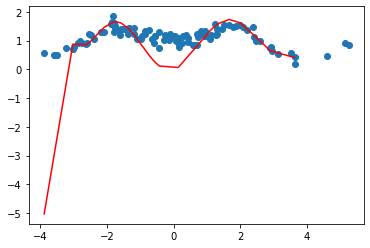

In [79]:
y_pred=np.dot(w.T,X_test_poly.T)
y_pred=y_pred.T
sort_zip=sorted(zip(X_test,y_pred))
a,b=zip(*sort_zip)
plt.plot(a,b,color='red')
plt.scatter(x,y)

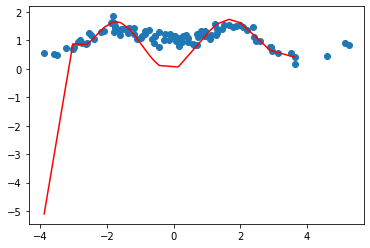

In [80]:
alpha = 0.01
X_train_poly= poly_f(X_train)
n, m = X_train_poly.shape
I = np.identity(m)
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train_poly.T, X_train_poly) + alpha * I), X_train_poly.T), y_train)
X_test_poly=poly_f(X_test)
y_pred=np.dot(w.T,X_test_poly.T)
y_pred=y_pred.T
sort_zip=sorted(zip(X_test,y_pred))
a,b=zip(*sort_zip)
plt.plot(a,b,color='red')
plt.scatter(x,y)


Psudo Inverse

In [60]:
from sklearn.metrics import mean_squared_error

1

In [91]:
w.shape

(10, 1)

In [107]:
print(w)
print(type(w))

[[ 3.38237729e-01]
 [ 1.39961518e+00]
 [-2.47777201e-01]
 [-3.70441111e-01]
 [ 6.74677765e-02]
 [ 3.31329837e-02]
 [-7.46987280e-03]
 [-7.73267464e-04]
 [ 2.77848929e-04]
 [-1.63057662e-05]]
<class 'numpy.ndarray'>


In [92]:
X_train_poly.shape

(70, 10)

In [109]:
w[6]=0
w[7]=0
print(w)

[[ 3.38237729e-01]
 [ 1.39961518e+00]
 [-2.47777201e-01]
 [-3.70441111e-01]
 [ 6.74677765e-02]
 [ 3.31329837e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.77848929e-04]
 [-1.63057662e-05]]


0.24772663603698036
1.2111587113159281


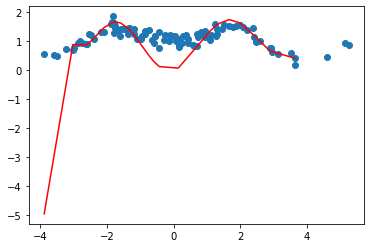

In [111]:
alpha = 0.1
X_train_poly= poly_f(X_train)
n, m = X_train_poly.shape
I = np.identity(m)
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train_poly.T, X_train_poly) + alpha * I), X_train_poly.T), y_train)
y_t=(np.dot(w.T,X_train_poly.T)).T
ein=mean_squared_error(y_train, y_t)
print(ein)

X_test_poly=poly_f(X_test)
y_pred=np.dot(w.T,X_test_poly.T)
y_pred=y_pred.T
eout=mean_squared_error(y_test, y_pred)
print(eout)

sort_zip=sorted(zip(X_test,y_pred))
a,b=zip(*sort_zip)
plt.plot(a,b,color='red')
plt.scatter(x,y)

0.24842676244291273
0.9901463864074167


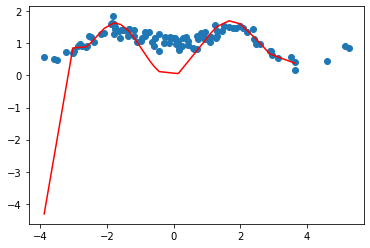

In [84]:
alpha = 0.5
X_train_poly= poly_f(X_train)
n, m = X_train_poly.shape
I = np.identity(m)
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train_poly.T, X_train_poly) + alpha * I), X_train_poly.T), y_train)
y_t=(np.dot(w.T,X_train_poly.T)).T
ein=mean_squared_error(y_train, y_t)
print(ein)

X_test_poly=poly_f(X_test)
y_pred=np.dot(w.T,X_test_poly.T)
y_pred=y_pred.T
eout=mean_squared_error(y_test, y_pred)
print(eout)

sort_zip=sorted(zip(X_test,y_pred))
a,b=zip(*sort_zip)
plt.plot(a,b,color='red')
plt.scatter(x,y)

0.2503258675276421
0.7775226507722415


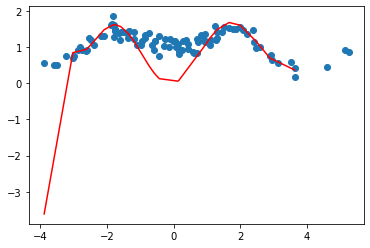

In [85]:
alpha = 1
X_train_poly= poly_f(X_train)
n, m = X_train_poly.shape
I = np.identity(m)
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train_poly.T, X_train_poly) + alpha * I), X_train_poly.T), y_train)
y_t=(np.dot(w.T,X_train_poly.T)).T
ein=mean_squared_error(y_train, y_t)
print(ein)

X_test_poly=poly_f(X_test)
y_pred=np.dot(w.T,X_test_poly.T)
y_pred=y_pred.T
eout=mean_squared_error(y_test, y_pred)
print(eout)

sort_zip=sorted(zip(X_test,y_pred))
a,b=zip(*sort_zip)
plt.plot(a,b,color='red')
plt.scatter(x,y)